In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("/data1/malto/volvo_ecml_2024/train_gen1.csv")
df.columns

Index(['Timesteps', 'ChassisId_encoded', 'gen', 'risk_level', 'af1__0',
       'af1__1', 'af1__2', 'af1__3', 'af1__4', 'af1__5',
       ...
       'f__233', 'f__234', 'f__235', 'f__236', 'f__237', 'f__238', 'f__239',
       'f__240', 'f__241', 'f__242'],
      dtype='object', length=308)

In [13]:
df

,Timesteps,ChassisId_encoded,gen,risk_level,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,...,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242
0,0.0,4953.0,gen1,High,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,...,-5.827349,-1.449851,-0.350315,2.627763,1.394857,0.192880,-0.495562,-0.928794,-0.214402,-0.090670
1,0.0,4955.0,gen1,Low,0.000322,0.00002,0.057749,8.627059e-08,0.029966,0.030469,...,0.230757,0.280036,-0.206586,0.784229,-0.088550,-0.836415,-0.484087,0.320285,2.311401,-0.026043
2,1.0,4955.0,gen1,Low,0.000322,0.00002,0.057749,8.627059e-08,0.029966,0.030469,...,0.230757,0.280036,-0.206586,0.811269,-0.091570,-0.841418,-0.472325,0.322941,2.284491,-0.026732
3,2.0,4955.0,gen1,Low,0.000322,0.00002,0.057749,8.627059e-08,0.029966,0.030469,...,0.230757,0.280036,-0.206586,0.839252,-0.029233,-0.817824,-0.509273,0.306841,2.266275,-0.027429
4,3.0,4955.0,gen1,Low,0.000322,0.00002,0.057749,8.627059e-08,0.029966,0.030469,...,0.230757,0.280036,-0.206586,0.868870,-0.002841,-0.808023,-0.513796,0.309057,2.237995,-0.028150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157432,12.0,102478.0,gen1,High,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,...,-5.827349,-1.449851,-0.350315,0.275486,-0.513768,-2.615375,1.035627,1.758682,0.122545,-0.088263
157433,13.0,102478.0,gen1,High,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,...,-5.827349,-1.449851,-0.350315,0.325303,-0.511595,-2.614036,1.043629,1.750753,0.114332,-0.088321
157434,14.0,102478.0,gen1,High,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,...,-5.827349,-1.449851,-0.350315,0.402587,-0.511128,-2.605104,1.058136,1.737135,0.102352,-0.088407
157435,15.0,102478.0,gen1,High,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,...,-5.827349,-1.449851,-0.350315,0.429919,-0.508548,-2.607412,1.061236,1.741602,0.098320,-0.088435


Timesteps
1       19
2       14
3       29
4       20
5      221
6      164
7      180
8      174
9      117
10     135
11     207
12     175
13     216
14     184
15     205
16     164
17      98
18     102
19     157
20     163
21     180
22     160
23     178
24     202
25     223
26     173
27     217
28     199
29    3001
30       1
34       1
35       1
Name: count, dtype: int64


<Axes: >

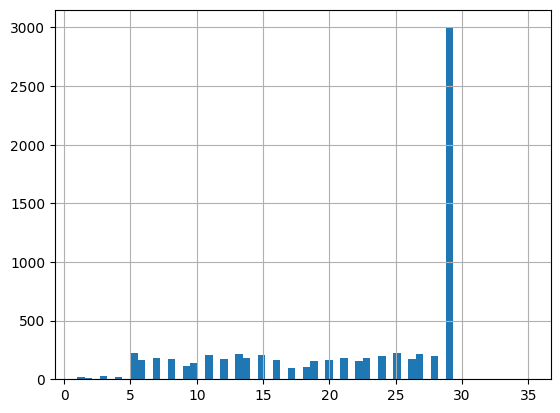

In [14]:
groups = df.groupby(by="ChassisId_encoded")
print(groups.agg('count')['Timesteps'].value_counts().sort_index())
groups.agg('count')['Timesteps'].hist(bins=60)

In [15]:
df['risk_level'].value_counts()

risk_level
Low       143442
High        8356
Medium      5639
Name: count, dtype: int64

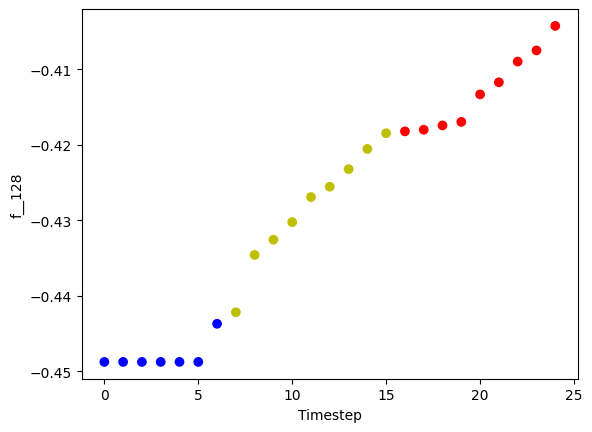

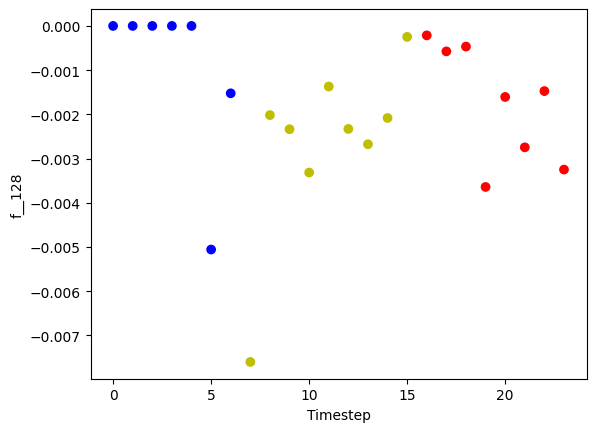

In [16]:
# Plot column number COL_NUM of a run 
# having more than one label (= not only Low) and 
# having a length = LENGTH RUN
# skipping the first  SKIP FIRST I run

COL_NUM = 193
LENGTH_RUN = 25
SKIP_FIRST_I = 180

risk_level_colors = {"Low": "b", "Medium":'y', "High":"r"}
for i, content in enumerate(groups):
    name, g = content
    if len(g) == LENGTH_RUN and g["risk_level"].nunique() > 1 and i > SKIP_FIRST_I:
        plt.xlabel("Timestep")
        plt.ylabel(g.columns[COL_NUM])
        plt.scatter(list(range(len(g))), g.iloc[:, COL_NUM], color=[risk_level_colors[x] for x in g["risk_level"]])
        plt.show()

        plt.xlabel("Timestep")
        plt.ylabel(str(g.columns[COL_NUM]) + "")
        plt.scatter(list(range(len(g))), g.iloc[:, COL_NUM] - g.iloc[:, COL_NUM].shift(-1), color=[risk_level_colors[x] for x in g["risk_level"]])
        plt.show()

        
        break
        

# Feature analysis

In [17]:
features = df.drop(['Timesteps', 'ChassisId_encoded', 'gen', 'risk_level'], axis=1)
# features = features.dropna(axis=0)
features.columns

Index(['af1__0', 'af1__1', 'af1__2', 'af1__3', 'af1__4', 'af1__5', 'af1__6',
       'af1__7', 'af1__8', 'af1__9',
       ...
       'f__233', 'f__234', 'f__235', 'f__236', 'f__237', 'f__238', 'f__239',
       'f__240', 'f__241', 'f__242'],
      dtype='object', length=304)

In [18]:
# Keep only the columns where nans are less than the entire df len
print("Columns containing only NaNs: \n", features.loc[:, (features.isnull().sum() == len(df)).to_numpy()])
features = features.loc[:, (features.isnull().sum() != len(df)).to_numpy()]
features.shape

Columns containing only NaNs: 
         f__51  f__52  f__65  f__117  f__119  f__123  f__133
0         NaN    NaN    NaN     NaN     NaN     NaN     NaN
1         NaN    NaN    NaN     NaN     NaN     NaN     NaN
2         NaN    NaN    NaN     NaN     NaN     NaN     NaN
3         NaN    NaN    NaN     NaN     NaN     NaN     NaN
4         NaN    NaN    NaN     NaN     NaN     NaN     NaN
...       ...    ...    ...     ...     ...     ...     ...
157432    NaN    NaN    NaN     NaN     NaN     NaN     NaN
157433    NaN    NaN    NaN     NaN     NaN     NaN     NaN
157434    NaN    NaN    NaN     NaN     NaN     NaN     NaN
157435    NaN    NaN    NaN     NaN     NaN     NaN     NaN
157436    NaN    NaN    NaN     NaN     NaN     NaN     NaN

[157437 rows x 7 columns]


(157437, 297)

In [19]:
# Drop every column that is constant (even through different runs lol)
print("Columns constant on entire dataset: \n", features.loc[:, features.apply(pd.Series.nunique) == 1])
features = features.loc[:, features.apply(pd.Series.nunique) != 1]
features.shape

Columns constant on entire dataset: 
         af2__5  af2__6  af2__13  af2__18  af2__19  af2__20  af2__22     f__22
0          0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
1          0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
2          0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
3          0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
4          0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
...        ...     ...      ...      ...      ...      ...      ...       ...
157432     0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
157433     0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
157434     0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
157435     0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128
157436     0.0     0.0      0.0      0.0      0.0      0.0      0.0 -0.009128

[157437 rows x 8 columns]

(157437, 289)

In [20]:
print("Number of remaining columns containing NaNs: ", (features.isnull().sum() > 0).sum())

Number of remaining columns containing NaNs:  0


# Classification of features

In [22]:
import pandas as pd

def classify_columns(df, ratio=0.2):
    classification = []

    for column in df.columns:
        unique_values = df[column].nunique()
        total_values = len(df[column])
        unique_ratio = unique_values / total_values
        
        # Heuristic: If unique ratio is high, it's likely numerical
        if df[column].dtype in [int, float] and unique_ratio > ratio:
            classification.append("numerical")
        # Heuristic: If unique ratio is low, it's likely categorical
        elif df[column].dtype == object or unique_ratio <= ratio:
            classification.append("categorical")
        # Heuristic: For integer columns, check the number of unique values
        elif df[column].dtype == int:
            if unique_values < 0.1 * total_values:  # Arbitrary threshold for uniqueness
                classification.append("categorical")
            else:
                classification.append("numerical")
        # Fallback: Classify as numerical if not sure
        else:
            classification.append("numerical")

    return classification


# Get the classification of each column
classification = classify_columns(features)

print("Column Classification:", classification)
print("Distribution:", pd.Series(classification).value_counts())


Column Classification: ['numerical', 'categorical', 'numerical', 'categorical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'categorical', 'numerical', 'numerical', 'categorical', 'categorical', 'numerical', 'categorical', 'categorical', 'numerical', 'numerical', 'categorical', 'numerical', 'numerical', 'categorical', 'categorical', 'numerical', 'numerical', 'categorical', 'categorical', 'numerical', 'categorical', 'categorical', 'categorical', 'numerical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'numerical', 'numerical', 'categorical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'numerical', 'categorical', 'categorical', 'numerical', 'numerical', 'numerical', 'categorical', 'numerical', 'categorical', 'categorical', 'numerical', 'numerical', 'numerical', 'categorical', 'numerical', 'categorical', 'categorical', 'numerical', 'numeric

# Correlation analysis

### Pearson correlation

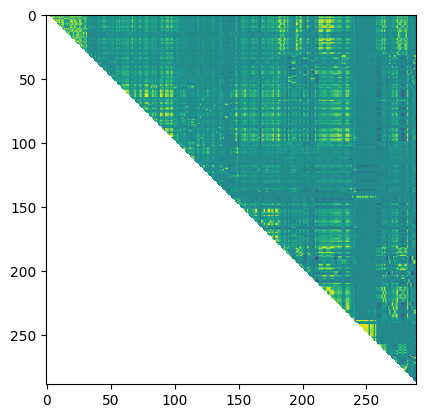

In [ ]:
correlation = features.corr()
mask = [[True if i<=j else False for i in range(len(correlation)) ] for j in range(len(correlation))]
correlation = correlation.mask(mask)

plt.imshow(correlation)
plt.show()

# correlation

(array([ 0.,  1., nan]), array([41555,    61, 41905]))
['af1__5', 'af1__10', 'af1__22', 'af1__26', 'af1__30', 'f__10', 'f__15', 'f__26', 'f__36', 'f__90', 'f__91', 'f__98', 'f__104', 'f__120', 'f__122', 'f__127', 'f__129', 'f__140', 'f__152', 'f__153', 'f__154', 'f__158', 'f__169', 'f__170', 'f__172', 'f__173', 'f__174', 'f__175', 'f__176', 'f__177', 'f__178', 'f__188', 'f__198', 'f__199', 'f__203', 'f__207', 'f__214', 'f__215', 'f__219', 'f__228', 'f__231', 'f__236']
42


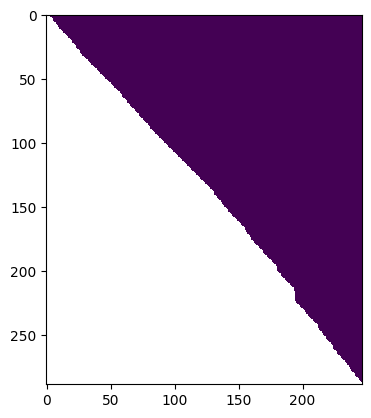

In [ ]:
CORRELATION_THRESHOLD = 0.99

c = correlation.copy()
c[ np.abs(c) > CORRELATION_THRESHOLD] = 1
c[ np.abs(c) <= CORRELATION_THRESHOLD] = 0

print(np.unique(c, return_counts=True))
# plt.imshow(c)

to_drop = [column for column in c.columns if any(c[column] == 1)]
print(to_drop)
print(len(to_drop))

c.drop(to_drop, axis=1, inplace=True)

plt.imshow(c)

### Spearman correlation

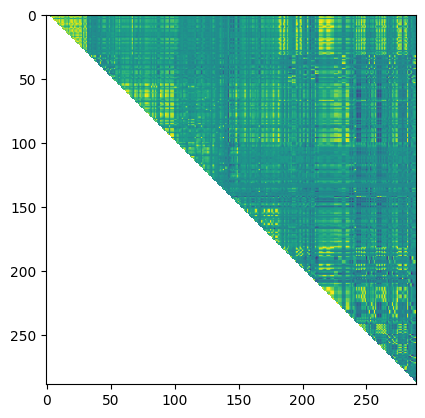

,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,af1__7,af1__8,af1__9,...,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242
af1__0,NaN,0.78574,0.681403,0.288908,0.737682,0.740471,0.803943,0.946531,0.921554,0.359790,...,0.217465,0.778805,0.768852,0.196683,0.001053,-0.050954,0.116507,0.073153,-0.021311,-0.089035
af1__1,NaN,NaN,0.536079,0.319180,0.573862,0.576344,0.589307,0.851963,0.680771,0.272808,...,0.173878,0.591856,0.864220,0.084866,0.101149,-0.032716,-0.019529,0.079390,0.016540,-0.042981
af1__2,NaN,NaN,NaN,0.212328,0.977728,0.977714,0.902092,0.619008,0.763034,0.768946,...,0.384582,0.499498,0.309669,0.560495,-0.208170,-0.070652,0.227331,0.047804,0.007500,0.016029
af1__3,NaN,NaN,NaN,NaN,0.232285,0.234122,0.255382,0.298677,0.273935,0.095095,...,0.072188,0.247607,0.275411,0.049754,0.018200,-0.093386,0.000769,0.103488,0.085716,0.040431
af1__4,NaN,NaN,NaN,NaN,NaN,0.996925,0.942959,0.666076,0.817213,0.693064,...,0.363326,0.597092,0.374179,0.504690,-0.186083,-0.044703,0.238905,0.026601,-0.026952,-0.033754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f__238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.224593,-0.930308,-0.231040,-0.190513
f__239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144399,-0.229973,-0.219325
f__240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.245620,0.146341
f__241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507351


In [ ]:
correlation = features.corr(method='spearman')
mask = [[True if i<=j else False for i in range(len(correlation)) ] for j in range(len(correlation))]
correlation = correlation.mask(mask)

plt.imshow(correlation)
plt.show()

correlation

(array([ 0.,  1., nan]), array([41491,   125, 41905]))
['af1__5', 'af1__10', 'af1__22', 'af1__26', 'af1__30', 'f__10', 'f__15', 'f__25', 'f__26', 'f__33', 'f__36', 'f__64', 'f__88', 'f__98', 'f__104', 'f__120', 'f__122', 'f__127', 'f__129', 'f__135', 'f__140', 'f__141', 'f__148', 'f__151', 'f__152', 'f__153', 'f__154', 'f__158', 'f__159', 'f__168', 'f__169', 'f__170', 'f__171', 'f__172', 'f__173', 'f__174', 'f__175', 'f__176', 'f__177', 'f__178', 'f__181', 'f__184', 'f__186', 'f__187', 'f__188', 'f__190', 'f__195', 'f__199', 'f__203', 'f__206', 'f__210', 'f__215', 'f__216', 'f__218', 'f__219', 'f__222', 'f__226', 'f__228', 'f__231', 'f__236']
60


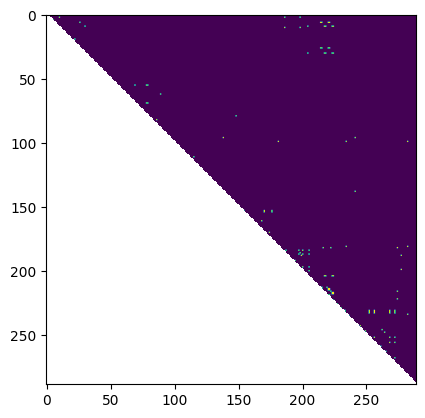

In [ ]:
CORRELATION_THRESHOLD = 0.99

c = correlation.copy()
c[ np.abs(c) > CORRELATION_THRESHOLD] = 1
c[ np.abs(c) <= CORRELATION_THRESHOLD] = 0

print(np.unique(c, return_counts=True))
plt.imshow(c)


to_drop = [column for column in c.columns if any(c[column] == 1)]
print(to_drop)
print(len(to_drop))

# First derivative features analysis


In [ ]:
dfeatures = features - features.shift(1)

print((dfeatures.mean() < 1e-3).sum())
print(len(dfeatures.columns))

289
289
